### Import Necessary Libraries

In [17]:
import pandas as pd #Data analysis library
import numpy as np #numerical operation
import matplotlib.pyplot as plt# basic visualization
import seaborn as sns#visualization
from sklearn.linear_model import LogisticRegression#Logistics regression model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve# Classification metrics
import warnings
from sklearn.preprocessing import StandardScaler #make a input variable to fit in a same scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV #to split train and test data.
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
pd.set_option('display.max_columns', None)#Display all columns in the data
warnings.filterwarnings('ignore')#Remove the warnings
%matplotlib inline

#### Import Data

In [2]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.info()
#Looklike there is no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### EDA

In [6]:
diabetes['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

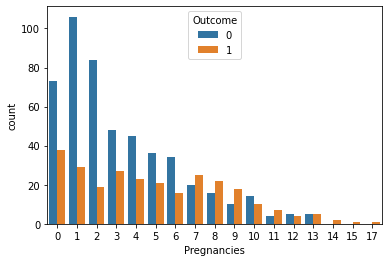

In [9]:
sns.countplot(x= 'Pregnancies', hue = 'Outcome', data = diabetes)

In [11]:
diabetes['Glucose'].nunique()

136

<AxesSubplot:ylabel='Density'>

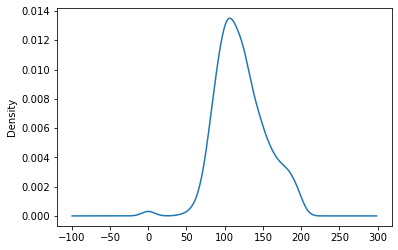

In [12]:
diabetes['Glucose'].plot.kde()

In [14]:
diabetes['BloodPressure'].nunique()

47

<AxesSubplot:ylabel='Density'>

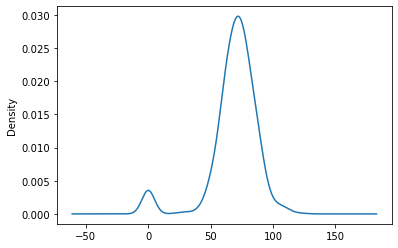

In [33]:
diabetes['BloodPressure'].plot.kde()

In [18]:
diabetes['SkinThickness'].nunique()

51

<AxesSubplot:xlabel='Glucose', ylabel='DiabetesPedigreeFunction'>

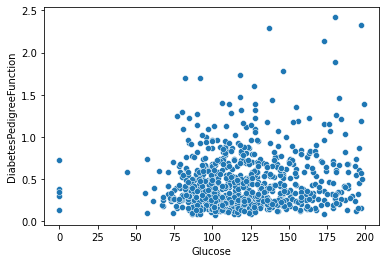

In [25]:
sns.scatterplot(x = diabetes['Glucose'], y = diabetes['DiabetesPedigreeFunction'])

In [23]:
diabetes['DiabetesPedigreeFunction']

0      0.627
1      0.351
2      0.672
3      0.167
4      2.288
       ...  
763    0.171
764    0.340
765    0.245
766    0.349
767    0.315
Name: DiabetesPedigreeFunction, Length: 768, dtype: float64

In [51]:
diabetes[(diabetes['Age']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [29]:
diabetes.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='BMI'>

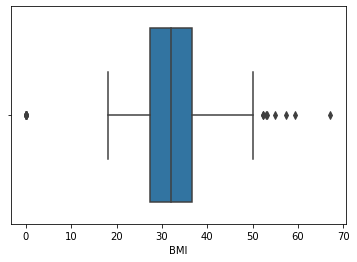

In [31]:
sns.boxplot(x = diabetes['BMI'])

In [4]:
def filling(col):
    median = diabetes[col].median()
    diabetes[col]=diabetes[col].replace(0,median)

In [5]:
filling('BloodPressure')

In [6]:
diabetes['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [7]:
filling('Glucose')

In [8]:
filling('SkinThickness')

In [9]:
filling('Insulin')

In [10]:
filling('BMI')

In [11]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### Scaling

In [12]:
sc = StandardScaler()

In [13]:
X_scaled = sc.fit_transform(diabetes.drop('Outcome', axis =1))

#### Spliting

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, diabetes['Outcome'], test_size=0.3, random_state=123)

#### Modelling

In [15]:
def metrics(y_true, y_pred):
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('\n\nAccuracy Score:\n', accuracy_score(y_true, y_pred))
    print('\n\nClassification Report: \n', classification_report(y_true, y_pred))

In [16]:
def predictions(model,X_train, X_test, y_train, y_test):
        model.fit(X_train, y_train)
        #predictions
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        plot_roc_curve(model, X_train, y_train)
        plt.show()
        actual = [y_train, y_test]
        pred = [train_pred, test_pred]
        for i in range(0,2):
            if i==0:
                print('----Train Metrics----')
            else:
                print('----Test Metrics----')
            metrics(actual[i], pred[i])

#### Logistics Regression

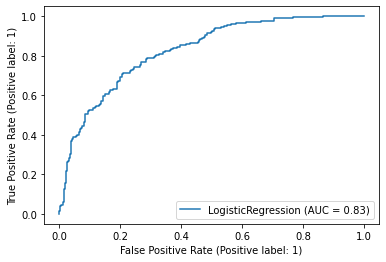

----Train Metrics----
Confusion Matrix:
 [[324  33]
 [ 87  93]]


Accuracy Score:
 0.776536312849162


Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.91      0.84       357
           1       0.74      0.52      0.61       180

    accuracy                           0.78       537
   macro avg       0.76      0.71      0.73       537
weighted avg       0.77      0.78      0.76       537

----Test Metrics----
Confusion Matrix:
 [[128  15]
 [ 33  55]]


Accuracy Score:
 0.7922077922077922


Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.84       143
           1       0.79      0.62      0.70        88

    accuracy                           0.79       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.79      0.79      0.79       231



In [88]:
lg_norm = LogisticRegression()
predictions(lg_norm, X_train, X_test, y_train, y_test)

In [89]:
lg = LogisticRegression(penalty='l2', class_weight={0:0.5, 1:0.7})


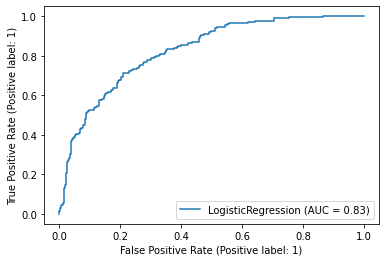

----Train Metrics----
Confusion Matrix:
 [[303  54]
 [ 71 109]]


Accuracy Score:
 0.7672253258845437


Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       357
           1       0.67      0.61      0.64       180

    accuracy                           0.77       537
   macro avg       0.74      0.73      0.73       537
weighted avg       0.76      0.77      0.76       537

----Test Metrics----
Confusion Matrix:
 [[120  23]
 [ 26  62]]


Accuracy Score:
 0.7878787878787878


Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       143
           1       0.73      0.70      0.72        88

    accuracy                           0.79       231
   macro avg       0.78      0.77      0.77       231
weighted avg       0.79      0.79      0.79       231



In [90]:
predictions(lg, X_train, X_test, y_train, y_test)

#### 

#### KNN

In [95]:
knn = KNeighborsClassifier(n_neighbors=9,n_jobs=-1)

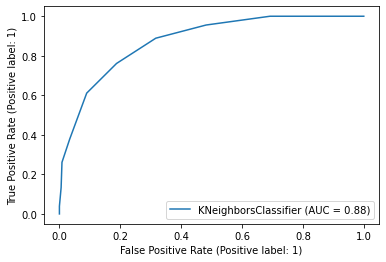

----Train Metrics----
Confusion Matrix:
 [[325  32]
 [ 70 110]]


Accuracy Score:
 0.8100558659217877


Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       357
           1       0.77      0.61      0.68       180

    accuracy                           0.81       537
   macro avg       0.80      0.76      0.77       537
weighted avg       0.81      0.81      0.80       537

----Test Metrics----
Confusion Matrix:
 [[123  20]
 [ 34  54]]


Accuracy Score:
 0.7662337662337663


Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       143
           1       0.73      0.61      0.67        88

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231



In [96]:
predictions(knn, X_train, X_test, y_train, y_test)

#### Naive Bayes 

In [97]:
from sklearn.naive_bayes import GaussianNB

In [98]:
nb = GaussianNB()

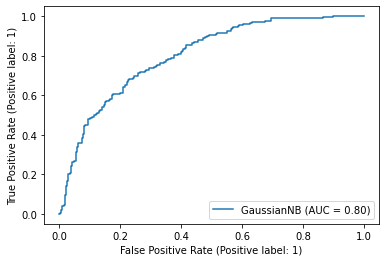

----Train Metrics----
Confusion Matrix:
 [[300  57]
 [ 77 103]]


Accuracy Score:
 0.750465549348231


Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       357
           1       0.64      0.57      0.61       180

    accuracy                           0.75       537
   macro avg       0.72      0.71      0.71       537
weighted avg       0.74      0.75      0.75       537

----Test Metrics----
Confusion Matrix:
 [[123  20]
 [ 31  57]]


Accuracy Score:
 0.7792207792207793


Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       143
           1       0.74      0.65      0.69        88

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



In [99]:
predictions(nb, X_train, X_test, y_train, y_test)

#### Random forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rf = RandomForestClassifier()

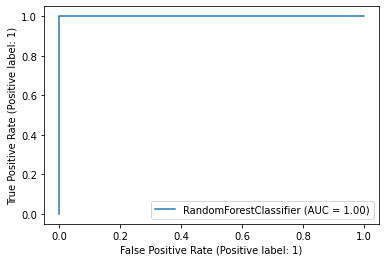

----Train Metrics----
Confusion Matrix:
 [[357   0]
 [  0 180]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       357
           1       1.00      1.00      1.00       180

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

----Test Metrics----
Confusion Matrix:
 [[120  23]
 [ 29  59]]


Accuracy Score:
 0.7748917748917749


Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       143
           1       0.72      0.67      0.69        88

    accuracy                           0.77       231
   macro avg       0.76      0.75      0.76       231
weighted avg       0.77      0.77      0.77       231



In [102]:
predictions(rf, X_train, X_test, y_train, y_test)

#### ADABOOST

In [22]:
ada = AdaBoostClassifier()

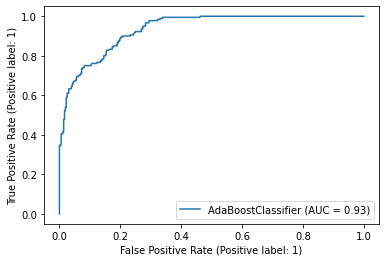

----Train Metrics----
Confusion Matrix:
 [[331  26]
 [ 49 131]]


Accuracy Score:
 0.8603351955307262


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       357
           1       0.83      0.73      0.78       180

    accuracy                           0.86       537
   macro avg       0.85      0.83      0.84       537
weighted avg       0.86      0.86      0.86       537

----Test Metrics----
Confusion Matrix:
 [[113  30]
 [ 31  57]]


Accuracy Score:
 0.7359307359307359


Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       143
           1       0.66      0.65      0.65        88

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [23]:
predictions(ada, X_train, X_test, y_train, y_test)

### XGBoost

In [24]:
xgb = XGBClassifier()

[10:15:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


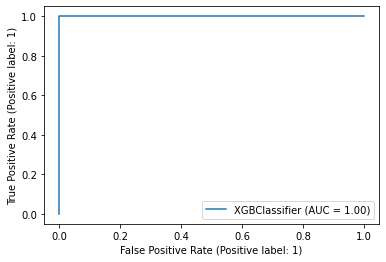

----Train Metrics----
Confusion Matrix:
 [[357   0]
 [  0 180]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       357
           1       1.00      1.00      1.00       180

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

----Test Metrics----
Confusion Matrix:
 [[113  30]
 [ 22  66]]


Accuracy Score:
 0.7748917748917749


Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       143
           1       0.69      0.75      0.72        88

    accuracy                           0.77       231
   macro avg       0.76      0.77      0.77       231
weighted avg       0.78      0.77      0.78       231



In [25]:
predictions(xgb, X_train, X_test, y_train, y_test)

**Finding best parameter by using Grid Search**

In [27]:
params = {
    'learning_rate' : [0.02,0.05, 0.08],
    'max_depth' : [3, 4, 5, 6, 8],
    'min_child_weight': [1, 3, 5],
    'gamma' : [0.0,0.1,0.2], #less than 1 make sure
    'colsample_bytree':[0.3,0.4,0.5] #less than 1
}

In [28]:
grid = GridSearchCV(xgb, params, n_jobs=-1, verbose=2)

In [29]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
[10:22:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                            

In [30]:
grid.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 1}

In [32]:
best_xgb=XGBClassifier(colsample_bytree=0.5,gamma=0.0,learning_rate=0.05,max_depth=3,min_child_weight=1)

[10:28:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


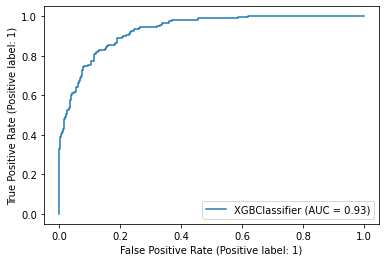

----Train Metrics----
Confusion Matrix:
 [[332  25]
 [ 56 124]]


Accuracy Score:
 0.8491620111731844


Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       357
           1       0.83      0.69      0.75       180

    accuracy                           0.85       537
   macro avg       0.84      0.81      0.82       537
weighted avg       0.85      0.85      0.85       537

----Test Metrics----
Confusion Matrix:
 [[119  24]
 [ 32  56]]


Accuracy Score:
 0.7575757575757576


Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       143
           1       0.70      0.64      0.67        88

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.75      0.76      0.76       231



In [33]:
predictions(best_xgb, X_train, X_test, y_train, y_test)

#### CATBoost

In [34]:
cat = CatBoostClassifier()

Learning rate set to 0.0079
0:	learn: 0.6886642	total: 58.3ms	remaining: 58.2s
1:	learn: 0.6853198	total: 60.1ms	remaining: 30s
2:	learn: 0.6814023	total: 62.1ms	remaining: 20.6s
3:	learn: 0.6774347	total: 64ms	remaining: 15.9s
4:	learn: 0.6737257	total: 65.9ms	remaining: 13.1s
5:	learn: 0.6699248	total: 68.1ms	remaining: 11.3s
6:	learn: 0.6664686	total: 71.1ms	remaining: 10.1s
7:	learn: 0.6633773	total: 72.9ms	remaining: 9.04s
8:	learn: 0.6595778	total: 75.1ms	remaining: 8.27s
9:	learn: 0.6564364	total: 77.1ms	remaining: 7.63s
10:	learn: 0.6528243	total: 78.9ms	remaining: 7.1s
11:	learn: 0.6494910	total: 80.8ms	remaining: 6.65s
12:	learn: 0.6458389	total: 82.6ms	remaining: 6.27s
13:	learn: 0.6432143	total: 84.8ms	remaining: 5.97s
14:	learn: 0.6402270	total: 86.6ms	remaining: 5.69s
15:	learn: 0.6367194	total: 88.4ms	remaining: 5.44s
16:	learn: 0.6331252	total: 90.3ms	remaining: 5.22s
17:	learn: 0.6296945	total: 92.3ms	remaining: 5.04s
18:	learn: 0.6266387	total: 94.3ms	remaining: 4.87s

219:	learn: 0.3974077	total: 531ms	remaining: 1.88s
220:	learn: 0.3968849	total: 533ms	remaining: 1.88s
221:	learn: 0.3965561	total: 535ms	remaining: 1.87s
222:	learn: 0.3961047	total: 537ms	remaining: 1.87s
223:	learn: 0.3954874	total: 539ms	remaining: 1.86s
224:	learn: 0.3948899	total: 540ms	remaining: 1.86s
225:	learn: 0.3945602	total: 545ms	remaining: 1.87s
226:	learn: 0.3941643	total: 547ms	remaining: 1.86s
227:	learn: 0.3937259	total: 549ms	remaining: 1.86s
228:	learn: 0.3931817	total: 551ms	remaining: 1.85s
229:	learn: 0.3926364	total: 553ms	remaining: 1.85s
230:	learn: 0.3922815	total: 557ms	remaining: 1.85s
231:	learn: 0.3918499	total: 561ms	remaining: 1.86s
232:	learn: 0.3913337	total: 564ms	remaining: 1.85s
233:	learn: 0.3908461	total: 566ms	remaining: 1.85s
234:	learn: 0.3904189	total: 569ms	remaining: 1.85s
235:	learn: 0.3900191	total: 571ms	remaining: 1.85s
236:	learn: 0.3895182	total: 573ms	remaining: 1.84s
237:	learn: 0.3889010	total: 575ms	remaining: 1.84s
238:	learn: 

379:	learn: 0.3392775	total: 875ms	remaining: 1.43s
380:	learn: 0.3391258	total: 878ms	remaining: 1.43s
381:	learn: 0.3388405	total: 881ms	remaining: 1.42s
382:	learn: 0.3383406	total: 883ms	remaining: 1.42s
383:	learn: 0.3381105	total: 885ms	remaining: 1.42s
384:	learn: 0.3378217	total: 887ms	remaining: 1.42s
385:	learn: 0.3376760	total: 888ms	remaining: 1.41s
386:	learn: 0.3374136	total: 890ms	remaining: 1.41s
387:	learn: 0.3371082	total: 892ms	remaining: 1.41s
388:	learn: 0.3367440	total: 894ms	remaining: 1.4s
389:	learn: 0.3365613	total: 896ms	remaining: 1.4s
390:	learn: 0.3363034	total: 899ms	remaining: 1.4s
391:	learn: 0.3359878	total: 902ms	remaining: 1.4s
392:	learn: 0.3357473	total: 904ms	remaining: 1.4s
393:	learn: 0.3356839	total: 905ms	remaining: 1.39s
394:	learn: 0.3354603	total: 907ms	remaining: 1.39s
395:	learn: 0.3352455	total: 909ms	remaining: 1.39s
396:	learn: 0.3348592	total: 912ms	remaining: 1.38s
397:	learn: 0.3347798	total: 913ms	remaining: 1.38s
398:	learn: 0.334

541:	learn: 0.3004406	total: 1.23s	remaining: 1.04s
542:	learn: 0.3002287	total: 1.23s	remaining: 1.03s
543:	learn: 0.2999776	total: 1.23s	remaining: 1.03s
544:	learn: 0.2996515	total: 1.23s	remaining: 1.03s
545:	learn: 0.2994850	total: 1.24s	remaining: 1.03s
546:	learn: 0.2993279	total: 1.24s	remaining: 1.02s
547:	learn: 0.2990853	total: 1.24s	remaining: 1.02s
548:	learn: 0.2987967	total: 1.24s	remaining: 1.02s
549:	learn: 0.2986301	total: 1.24s	remaining: 1.02s
550:	learn: 0.2983853	total: 1.25s	remaining: 1.01s
551:	learn: 0.2981614	total: 1.25s	remaining: 1.01s
552:	learn: 0.2978460	total: 1.25s	remaining: 1.01s
553:	learn: 0.2972932	total: 1.25s	remaining: 1.01s
554:	learn: 0.2971500	total: 1.25s	remaining: 1s
555:	learn: 0.2970034	total: 1.25s	remaining: 1s
556:	learn: 0.2966871	total: 1.26s	remaining: 1s
557:	learn: 0.2962361	total: 1.26s	remaining: 999ms
558:	learn: 0.2959267	total: 1.26s	remaining: 996ms
559:	learn: 0.2955565	total: 1.26s	remaining: 994ms
560:	learn: 0.2952483

702:	learn: 0.2660372	total: 1.69s	remaining: 713ms
703:	learn: 0.2658673	total: 1.7s	remaining: 713ms
704:	learn: 0.2656726	total: 1.7s	remaining: 711ms
705:	learn: 0.2655532	total: 1.7s	remaining: 709ms
706:	learn: 0.2653991	total: 1.71s	remaining: 707ms
707:	learn: 0.2652445	total: 1.71s	remaining: 705ms
708:	learn: 0.2648889	total: 1.71s	remaining: 703ms
709:	learn: 0.2647685	total: 1.72s	remaining: 701ms
710:	learn: 0.2645994	total: 1.72s	remaining: 698ms
711:	learn: 0.2643185	total: 1.72s	remaining: 696ms
712:	learn: 0.2643035	total: 1.72s	remaining: 694ms
713:	learn: 0.2641315	total: 1.73s	remaining: 692ms
714:	learn: 0.2638923	total: 1.73s	remaining: 690ms
715:	learn: 0.2636845	total: 1.74s	remaining: 689ms
716:	learn: 0.2634732	total: 1.74s	remaining: 686ms
717:	learn: 0.2633857	total: 1.74s	remaining: 684ms
718:	learn: 0.2630017	total: 1.74s	remaining: 681ms
719:	learn: 0.2626857	total: 1.74s	remaining: 678ms
720:	learn: 0.2624970	total: 1.75s	remaining: 676ms
721:	learn: 0.2

911:	learn: 0.2287091	total: 2.21s	remaining: 213ms
912:	learn: 0.2281966	total: 2.21s	remaining: 211ms
913:	learn: 0.2279969	total: 2.22s	remaining: 209ms
914:	learn: 0.2278344	total: 2.22s	remaining: 206ms
915:	learn: 0.2277683	total: 2.22s	remaining: 204ms
916:	learn: 0.2276313	total: 2.23s	remaining: 201ms
917:	learn: 0.2275118	total: 2.23s	remaining: 199ms
918:	learn: 0.2274250	total: 2.23s	remaining: 196ms
919:	learn: 0.2272457	total: 2.23s	remaining: 194ms
920:	learn: 0.2271192	total: 2.23s	remaining: 192ms
921:	learn: 0.2269383	total: 2.24s	remaining: 189ms
922:	learn: 0.2268179	total: 2.24s	remaining: 187ms
923:	learn: 0.2265298	total: 2.24s	remaining: 184ms
924:	learn: 0.2264305	total: 2.24s	remaining: 182ms
925:	learn: 0.2261774	total: 2.24s	remaining: 179ms
926:	learn: 0.2261119	total: 2.25s	remaining: 177ms
927:	learn: 0.2260151	total: 2.25s	remaining: 174ms
928:	learn: 0.2258441	total: 2.25s	remaining: 172ms
929:	learn: 0.2258123	total: 2.25s	remaining: 169ms
930:	learn: 

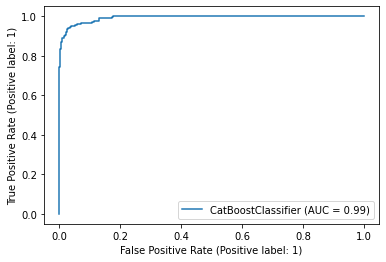

----Train Metrics----
Confusion Matrix:
 [[354   3]
 [ 20 160]]


Accuracy Score:
 0.957169459962756


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       357
           1       0.98      0.89      0.93       180

    accuracy                           0.96       537
   macro avg       0.96      0.94      0.95       537
weighted avg       0.96      0.96      0.96       537

----Test Metrics----
Confusion Matrix:
 [[118  25]
 [ 25  63]]


Accuracy Score:
 0.7835497835497836


Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       143
           1       0.72      0.72      0.72        88

    accuracy                           0.78       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.78      0.78      0.78       231



In [35]:
predictions(cat, X_train, X_test, y_train, y_test)

In [36]:
params_cat = {
    'learning_rate' : [0.02,0.05, 0.07],
    'max_depth' : [3, 4, 5, 6, 8],
    'min_child_samples': [1, 3, 5],
    'l2_leaf_reg':[5,10,15]
}

In [37]:
grid_cat = GridSearchCV(cat, params_cat, cv=3, n_jobs=-1)

In [39]:
grid_cat.fit(X_train,y_train)

0:	learn: 0.6847908	total: 1.14ms	remaining: 1.14s
1:	learn: 0.6792341	total: 4.75ms	remaining: 2.37s
2:	learn: 0.6740986	total: 6.04ms	remaining: 2.01s
3:	learn: 0.6686185	total: 7.09ms	remaining: 1.76s
4:	learn: 0.6607501	total: 8.12ms	remaining: 1.61s
5:	learn: 0.6539062	total: 9.17ms	remaining: 1.52s
6:	learn: 0.6480684	total: 10.6ms	remaining: 1.5s
7:	learn: 0.6428980	total: 12ms	remaining: 1.49s
8:	learn: 0.6377275	total: 13ms	remaining: 1.44s
9:	learn: 0.6340073	total: 14.1ms	remaining: 1.39s
10:	learn: 0.6302528	total: 15.1ms	remaining: 1.36s
11:	learn: 0.6250938	total: 16.1ms	remaining: 1.33s
12:	learn: 0.6206401	total: 17.1ms	remaining: 1.3s
13:	learn: 0.6166874	total: 18.1ms	remaining: 1.27s
14:	learn: 0.6116222	total: 19.1ms	remaining: 1.25s
15:	learn: 0.6064457	total: 20.1ms	remaining: 1.24s
16:	learn: 0.6026498	total: 21.1ms	remaining: 1.22s
17:	learn: 0.5987963	total: 22.4ms	remaining: 1.22s
18:	learn: 0.5947959	total: 25.4ms	remaining: 1.31s
19:	learn: 0.5888205	total: 

214:	learn: 0.4170551	total: 299ms	remaining: 1.09s
215:	learn: 0.4166654	total: 301ms	remaining: 1.09s
216:	learn: 0.4163638	total: 302ms	remaining: 1.09s
217:	learn: 0.4161532	total: 303ms	remaining: 1.09s
218:	learn: 0.4156334	total: 304ms	remaining: 1.08s
219:	learn: 0.4153947	total: 306ms	remaining: 1.08s
220:	learn: 0.4152823	total: 307ms	remaining: 1.08s
221:	learn: 0.4149995	total: 309ms	remaining: 1.08s
222:	learn: 0.4142097	total: 310ms	remaining: 1.08s
223:	learn: 0.4138422	total: 311ms	remaining: 1.07s
224:	learn: 0.4137407	total: 312ms	remaining: 1.07s
225:	learn: 0.4134590	total: 313ms	remaining: 1.07s
226:	learn: 0.4131474	total: 315ms	remaining: 1.07s
227:	learn: 0.4128413	total: 317ms	remaining: 1.07s
228:	learn: 0.4124527	total: 318ms	remaining: 1.07s
229:	learn: 0.4122859	total: 320ms	remaining: 1.07s
230:	learn: 0.4119211	total: 321ms	remaining: 1.07s
231:	learn: 0.4116444	total: 322ms	remaining: 1.07s
232:	learn: 0.4112827	total: 324ms	remaining: 1.06s
233:	learn: 

404:	learn: 0.3621784	total: 604ms	remaining: 888ms
405:	learn: 0.3616742	total: 606ms	remaining: 887ms
406:	learn: 0.3612872	total: 610ms	remaining: 889ms
407:	learn: 0.3608723	total: 612ms	remaining: 888ms
408:	learn: 0.3605201	total: 613ms	remaining: 886ms
409:	learn: 0.3602286	total: 615ms	remaining: 885ms
410:	learn: 0.3598878	total: 618ms	remaining: 886ms
411:	learn: 0.3595448	total: 620ms	remaining: 884ms
412:	learn: 0.3593550	total: 621ms	remaining: 882ms
413:	learn: 0.3590937	total: 622ms	remaining: 881ms
414:	learn: 0.3587926	total: 639ms	remaining: 901ms
415:	learn: 0.3585511	total: 641ms	remaining: 899ms
416:	learn: 0.3582523	total: 641ms	remaining: 897ms
417:	learn: 0.3580109	total: 642ms	remaining: 894ms
418:	learn: 0.3577339	total: 643ms	remaining: 892ms
419:	learn: 0.3574096	total: 644ms	remaining: 889ms
420:	learn: 0.3568172	total: 645ms	remaining: 887ms
421:	learn: 0.3564518	total: 646ms	remaining: 884ms
422:	learn: 0.3561902	total: 648ms	remaining: 884ms
423:	learn: 

567:	learn: 0.3231278	total: 908ms	remaining: 690ms
568:	learn: 0.3228768	total: 909ms	remaining: 689ms
569:	learn: 0.3226211	total: 911ms	remaining: 688ms
570:	learn: 0.3224768	total: 914ms	remaining: 687ms
571:	learn: 0.3223278	total: 916ms	remaining: 685ms
572:	learn: 0.3222971	total: 918ms	remaining: 684ms
573:	learn: 0.3222599	total: 921ms	remaining: 683ms
574:	learn: 0.3218895	total: 921ms	remaining: 681ms
575:	learn: 0.3218554	total: 922ms	remaining: 679ms
576:	learn: 0.3217215	total: 923ms	remaining: 677ms
577:	learn: 0.3212973	total: 924ms	remaining: 674ms
578:	learn: 0.3212689	total: 925ms	remaining: 672ms
579:	learn: 0.3210404	total: 926ms	remaining: 670ms
580:	learn: 0.3206342	total: 927ms	remaining: 668ms
581:	learn: 0.3202689	total: 928ms	remaining: 666ms
582:	learn: 0.3200487	total: 928ms	remaining: 664ms
583:	learn: 0.3200208	total: 929ms	remaining: 662ms
584:	learn: 0.3198915	total: 942ms	remaining: 668ms
585:	learn: 0.3196700	total: 943ms	remaining: 666ms
586:	learn: 

759:	learn: 0.2905094	total: 1.19s	remaining: 376ms
760:	learn: 0.2903434	total: 1.19s	remaining: 374ms
761:	learn: 0.2901125	total: 1.19s	remaining: 373ms
762:	learn: 0.2899957	total: 1.19s	remaining: 371ms
763:	learn: 0.2897393	total: 1.19s	remaining: 369ms
764:	learn: 0.2895959	total: 1.2s	remaining: 367ms
765:	learn: 0.2895123	total: 1.2s	remaining: 367ms
766:	learn: 0.2891589	total: 1.2s	remaining: 365ms
767:	learn: 0.2890597	total: 1.2s	remaining: 364ms
768:	learn: 0.2888197	total: 1.21s	remaining: 362ms
769:	learn: 0.2885237	total: 1.21s	remaining: 360ms
770:	learn: 0.2882409	total: 1.21s	remaining: 359ms
771:	learn: 0.2880050	total: 1.21s	remaining: 357ms
772:	learn: 0.2877092	total: 1.21s	remaining: 355ms
773:	learn: 0.2876173	total: 1.21s	remaining: 353ms
774:	learn: 0.2873454	total: 1.21s	remaining: 352ms
775:	learn: 0.2872621	total: 1.21s	remaining: 350ms
776:	learn: 0.2871670	total: 1.21s	remaining: 348ms
777:	learn: 0.2868554	total: 1.22s	remaining: 347ms
778:	learn: 0.28

965:	learn: 0.2584448	total: 1.49s	remaining: 52.6ms
966:	learn: 0.2584293	total: 1.5s	remaining: 51ms
967:	learn: 0.2583657	total: 1.5s	remaining: 49.5ms
968:	learn: 0.2582578	total: 1.5s	remaining: 47.9ms
969:	learn: 0.2582212	total: 1.5s	remaining: 46.3ms
970:	learn: 0.2580901	total: 1.5s	remaining: 44.8ms
971:	learn: 0.2580107	total: 1.5s	remaining: 43.2ms
972:	learn: 0.2578122	total: 1.5s	remaining: 41.6ms
973:	learn: 0.2577455	total: 1.5s	remaining: 40.1ms
974:	learn: 0.2575573	total: 1.5s	remaining: 38.6ms
975:	learn: 0.2572576	total: 1.51s	remaining: 37ms
976:	learn: 0.2569940	total: 1.51s	remaining: 35.5ms
977:	learn: 0.2568753	total: 1.51s	remaining: 34ms
978:	learn: 0.2566895	total: 1.51s	remaining: 32.5ms
979:	learn: 0.2565267	total: 1.51s	remaining: 30.9ms
980:	learn: 0.2564934	total: 1.52s	remaining: 29.4ms
981:	learn: 0.2562763	total: 1.52s	remaining: 27.8ms
982:	learn: 0.2561560	total: 1.52s	remaining: 26.2ms
983:	learn: 0.2558762	total: 1.52s	remaining: 24.7ms
984:	lea

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7ffcd3084f10>,
             n_jobs=-1,
             param_grid={'l2_leaf_reg': [5, 10, 15],
                         'learning_rate': [0.02, 0.05, 0.07],
                         'max_depth': [3, 4, 5, 6, 8],
                         'min_child_samples': [1, 3, 5]})

In [40]:
grid_cat.best_params_

{'l2_leaf_reg': 5,
 'learning_rate': 0.02,
 'max_depth': 3,
 'min_child_samples': 1}

In [41]:
best_cat = CatBoostClassifier(l2_leaf_reg=5, learning_rate=0.02, max_depth=3, min_child_samples=1)

0:	learn: 0.6847908	total: 869us	remaining: 869ms
1:	learn: 0.6792341	total: 1.96ms	remaining: 980ms
2:	learn: 0.6740986	total: 3.5ms	remaining: 1.16s
3:	learn: 0.6686185	total: 4.65ms	remaining: 1.16s
4:	learn: 0.6607501	total: 5.81ms	remaining: 1.16s
5:	learn: 0.6539062	total: 6.97ms	remaining: 1.15s
6:	learn: 0.6480684	total: 8.07ms	remaining: 1.14s
7:	learn: 0.6428980	total: 9.11ms	remaining: 1.13s
8:	learn: 0.6377275	total: 10.2ms	remaining: 1.12s
9:	learn: 0.6340073	total: 11.2ms	remaining: 1.11s
10:	learn: 0.6302528	total: 12.3ms	remaining: 1.1s
11:	learn: 0.6250938	total: 13.3ms	remaining: 1.1s
12:	learn: 0.6206401	total: 14.3ms	remaining: 1.09s
13:	learn: 0.6166874	total: 15.8ms	remaining: 1.11s
14:	learn: 0.6116222	total: 17.8ms	remaining: 1.17s
15:	learn: 0.6064457	total: 18.8ms	remaining: 1.16s
16:	learn: 0.6026498	total: 19.9ms	remaining: 1.15s
17:	learn: 0.5987963	total: 21ms	remaining: 1.15s
18:	learn: 0.5947959	total: 22ms	remaining: 1.14s
19:	learn: 0.5888205	total: 23

220:	learn: 0.4152823	total: 366ms	remaining: 1.29s
221:	learn: 0.4149995	total: 368ms	remaining: 1.29s
222:	learn: 0.4142097	total: 369ms	remaining: 1.29s
223:	learn: 0.4138422	total: 371ms	remaining: 1.28s
224:	learn: 0.4137407	total: 375ms	remaining: 1.29s
225:	learn: 0.4134590	total: 377ms	remaining: 1.29s
226:	learn: 0.4131474	total: 380ms	remaining: 1.29s
227:	learn: 0.4128413	total: 382ms	remaining: 1.29s
228:	learn: 0.4124527	total: 384ms	remaining: 1.29s
229:	learn: 0.4122859	total: 388ms	remaining: 1.3s
230:	learn: 0.4119211	total: 389ms	remaining: 1.29s
231:	learn: 0.4116444	total: 399ms	remaining: 1.32s
232:	learn: 0.4112827	total: 409ms	remaining: 1.35s
233:	learn: 0.4110991	total: 411ms	remaining: 1.34s
234:	learn: 0.4108718	total: 412ms	remaining: 1.34s
235:	learn: 0.4104856	total: 413ms	remaining: 1.34s
236:	learn: 0.4100506	total: 415ms	remaining: 1.33s
237:	learn: 0.4098887	total: 416ms	remaining: 1.33s
238:	learn: 0.4095887	total: 418ms	remaining: 1.33s
239:	learn: 0

430:	learn: 0.3546151	total: 690ms	remaining: 911ms
431:	learn: 0.3544025	total: 692ms	remaining: 909ms
432:	learn: 0.3540790	total: 693ms	remaining: 907ms
433:	learn: 0.3536118	total: 694ms	remaining: 905ms
434:	learn: 0.3534827	total: 695ms	remaining: 903ms
435:	learn: 0.3532522	total: 696ms	remaining: 900ms
436:	learn: 0.3530550	total: 697ms	remaining: 898ms
437:	learn: 0.3528469	total: 698ms	remaining: 895ms
438:	learn: 0.3526802	total: 699ms	remaining: 893ms
439:	learn: 0.3525789	total: 700ms	remaining: 891ms
440:	learn: 0.3521829	total: 701ms	remaining: 889ms
441:	learn: 0.3518748	total: 703ms	remaining: 888ms
442:	learn: 0.3516177	total: 705ms	remaining: 886ms
443:	learn: 0.3512931	total: 706ms	remaining: 884ms
444:	learn: 0.3509950	total: 708ms	remaining: 883ms
445:	learn: 0.3507849	total: 710ms	remaining: 881ms
446:	learn: 0.3506061	total: 711ms	remaining: 880ms
447:	learn: 0.3505534	total: 713ms	remaining: 878ms
448:	learn: 0.3500552	total: 714ms	remaining: 876ms
449:	learn: 

652:	learn: 0.3071612	total: 1s	remaining: 533ms
653:	learn: 0.3070246	total: 1.02s	remaining: 539ms
654:	learn: 0.3066879	total: 1.02s	remaining: 539ms
655:	learn: 0.3065665	total: 1.03s	remaining: 539ms
656:	learn: 0.3065360	total: 1.03s	remaining: 538ms
657:	learn: 0.3064064	total: 1.03s	remaining: 536ms
658:	learn: 0.3062048	total: 1.03s	remaining: 536ms
659:	learn: 0.3059193	total: 1.04s	remaining: 536ms
660:	learn: 0.3057420	total: 1.04s	remaining: 536ms
661:	learn: 0.3054685	total: 1.05s	remaining: 536ms
662:	learn: 0.3051503	total: 1.05s	remaining: 534ms
663:	learn: 0.3051187	total: 1.07s	remaining: 540ms
664:	learn: 0.3049496	total: 1.07s	remaining: 539ms
665:	learn: 0.3048893	total: 1.07s	remaining: 538ms
666:	learn: 0.3045897	total: 1.07s	remaining: 537ms
667:	learn: 0.3044276	total: 1.08s	remaining: 535ms
668:	learn: 0.3042449	total: 1.08s	remaining: 535ms
669:	learn: 0.3041909	total: 1.15s	remaining: 568ms
670:	learn: 0.3039581	total: 1.17s	remaining: 574ms
671:	learn: 0.3

844:	learn: 0.2762442	total: 1.5s	remaining: 276ms
845:	learn: 0.2760904	total: 1.5s	remaining: 274ms
846:	learn: 0.2758627	total: 1.51s	remaining: 272ms
847:	learn: 0.2755737	total: 1.51s	remaining: 270ms
848:	learn: 0.2754263	total: 1.51s	remaining: 268ms
849:	learn: 0.2751042	total: 1.51s	remaining: 267ms
850:	learn: 0.2748808	total: 1.51s	remaining: 265ms
851:	learn: 0.2745884	total: 1.51s	remaining: 263ms
852:	learn: 0.2742733	total: 1.51s	remaining: 261ms
853:	learn: 0.2741593	total: 1.52s	remaining: 259ms
854:	learn: 0.2740798	total: 1.52s	remaining: 258ms
855:	learn: 0.2740603	total: 1.52s	remaining: 256ms
856:	learn: 0.2739344	total: 1.52s	remaining: 254ms
857:	learn: 0.2739153	total: 1.52s	remaining: 252ms
858:	learn: 0.2737397	total: 1.52s	remaining: 250ms
859:	learn: 0.2734719	total: 1.53s	remaining: 249ms
860:	learn: 0.2732538	total: 1.53s	remaining: 247ms
861:	learn: 0.2730747	total: 1.53s	remaining: 245ms
862:	learn: 0.2730542	total: 1.53s	remaining: 243ms
863:	learn: 0.

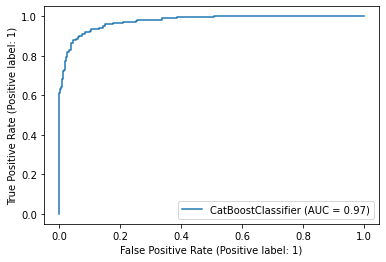

----Train Metrics----
Confusion Matrix:
 [[348   9]
 [ 37 143]]


Accuracy Score:
 0.9143389199255121


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       357
           1       0.94      0.79      0.86       180

    accuracy                           0.91       537
   macro avg       0.92      0.88      0.90       537
weighted avg       0.92      0.91      0.91       537

----Test Metrics----
Confusion Matrix:
 [[117  26]
 [ 27  61]]


Accuracy Score:
 0.7705627705627706


Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       143
           1       0.70      0.69      0.70        88

    accuracy                           0.77       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.77      0.77      0.77       231



In [42]:
predictions(best_cat, X_train, X_test, y_train, y_test)

### SVM

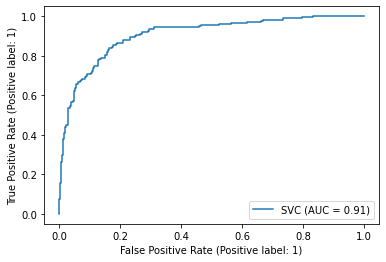

----Train Metrics----
Confusion Matrix:
 [[341  16]
 [ 77 103]]


Accuracy Score:
 0.8268156424581006


Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.96      0.88       357
           1       0.87      0.57      0.69       180

    accuracy                           0.83       537
   macro avg       0.84      0.76      0.78       537
weighted avg       0.83      0.83      0.82       537

----Test Metrics----
Confusion Matrix:
 [[125  18]
 [ 35  53]]


Accuracy Score:
 0.7705627705627706


Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.87      0.83       143
           1       0.75      0.60      0.67        88

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.76       231



In [20]:
svm = SVC()

predictions(svm, X_train, X_test, y_train, y_test)